<a href="https://colab.research.google.com/github/Hriday1001/DTU-AUV/blob/main/BrailleOpenCV_character.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
file_name = "/content/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
from copy import deepcopy
import os
import numpy as np
import pandas as pd
from shutil import copyfile

In [3]:
os.mkdir('./images/')
alpha = 'a'
for i in range(0, 26): 
	os.mkdir('./images/' + alpha)
	alpha = chr(ord(alpha) + 1)

In [4]:
rootdir = '/content/Braille Dataset/Braille Dataset/'
for file in os.walk(rootdir):
  for ind_file in file[2]:
    ind_file_string = ''.join(str(elm) for elm in ind_file)
    path = (rootdir + ind_file_string)
    letter = ind_file[0]
    file_string = ''.join(str(element) for element in file[2])
    copyfile(path,('/content/images/' + letter + '/' + ind_file_string))

In [5]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('./images/',
                                              target_size=(26,26),
                                              subset='training')

val_generator = datagen.flow_from_directory('./images/',
                                            target_size=(26,26),
                                            subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [ ]:
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

K.clear_session()

model_ckpt = ModelCheckpoint('BrailleNet.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(26,26,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(26,activation='softmax')(x)

model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              validation_data=val_generator,
                              epochs=500,
                              callbacks=[model_ckpt,reduce_lr,early_stop],
                              verbose=1)

<ipython-input-6-281ab1c5ae10>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/500
39/39 [==============================] - 5s 84ms/step - loss: 3.2824 - accuracy: 0.0401 - val_loss: 3.2624 - val_accuracy: 0.1026 - lr: 0.0010
Epoch 2/500
39/39 [==============================] - 4s 102ms/step - loss: 3.2123 - accuracy: 0.0689 - val_loss: 3.0421 - val_accuracy: 0.1282 - lr: 0.0010
Epoch 3/500
39/39 [==============================] - 3s 65ms/step - loss: 2.8275 - accuracy: 0.1587 - val_loss: 2.5504 - val_accuracy: 0.2308 - lr: 0.0010
Epoch 4/500
39/39 [==============================] - 3s 74ms/step - loss: 2.5002 - accuracy: 0.2692 - val_loss: 2.1987 - val_accuracy: 0.3718 - lr: 0.0010
Epoch 5/500
39/39 [==============================] - 3s 66ms/step - loss: 2.0625 - accuracy: 0.4199 - val_loss: 1.9052 - val_accuracy: 0.4744 - lr: 0.0010
Epoch 6/500
39/39 [==============================] - 3s 85ms/step - loss: 1.6342 - accuracy: 0.5168 - val_loss: 1.4857 - val_accuracy: 0.5353 - lr: 0.0010
Epoch 7/500
39/39 [==============================] - 3s 74ms/step - l

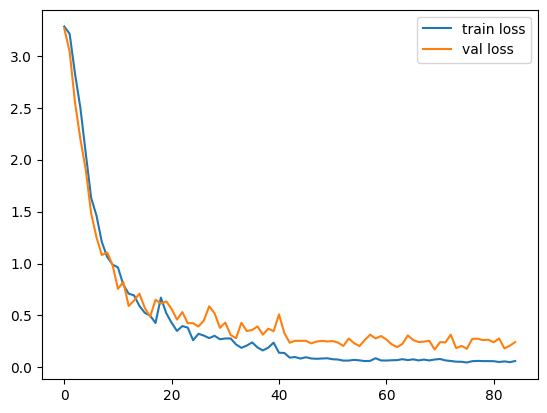

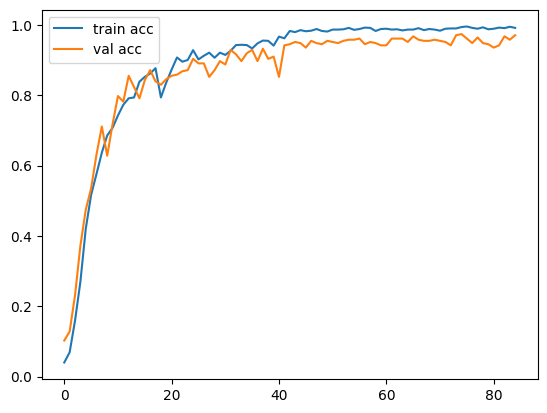

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/character_p.png")

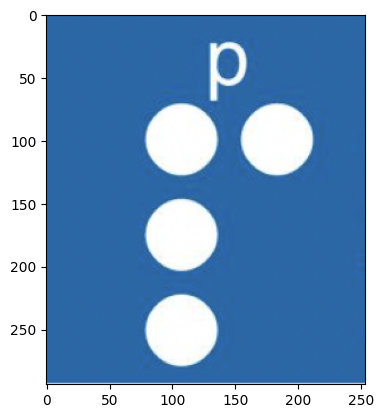

In [ ]:
plt.imshow(img)


In [ ]:
from tensorflow.keras.utils import img_to_array
x = img_to_array(img)
x

In [ ]:
x.shape

(294, 254, 3)

In [ ]:
import cv2
resized = cv2.resize(x, (26, 26))

In [ ]:
resized.shape

(26, 26, 3)

In [ ]:
resized=np.expand_dims(resized,axis=0)
model.predict(resized)

1/1 [==============================] - 0s 112ms/step


array([[0.0000000e+00, 3.7828487e-15, 0.0000000e+00, 2.0263174e-25,
        0.0000000e+00, 2.0537173e-14, 1.4536504e-18, 1.2673387e-28,
        0.0000000e+00, 1.8177640e-19, 0.0000000e+00, 5.6658342e-07,
        0.0000000e+00, 1.6888807e-37, 0.0000000e+00, 5.1072341e-11,
        8.0003792e-01, 6.9866245e-14, 6.7704134e-30, 5.3022912e-08,
        0.0000000e+00, 2.3017959e-07, 1.9996122e-01, 0.0000000e+00,
        2.0552630e-16, 0.0000000e+00]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(resized), axis=1)
a

1/1 [==============================] - 0s 37ms/step


array([16])

In [ ]:
letter = chr(a[0] + ord('a') - 1)
print(letter)

p


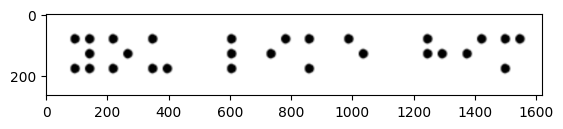

In [6]:
import cv2
import matplotlib.pyplot as plt
image_loc = "/content/sentence.png"
image = cv2.imread(image_loc,0)
plt.imshow(image,cmap="gray")

In [7]:
from copy import deepcopy
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


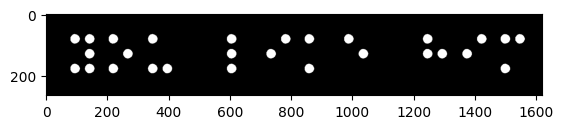

In [8]:
import imutils
blurred = cv2.GaussianBlur(image,(5,5),0)
edged = cv2.Canny(blurred,50,200,255)
thresh_inv = cv2.threshold(image,0,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
ctrs = cv2.findContours(thresh_inv.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
ctrs = imutils.grab_contours(ctrs)
plt.imshow(thresh_inv,cmap="gray")

In [9]:
!pip install histograms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for histograms: filename=histograms-1.0.0-py3-none-any.whl size=7064 sha256=2c53d9269b2160267d1460304829441c14719a1fb98bf2a6712c9cfb3c66196f
  Stored in directory: /root/.cache/pip/wheels/2b/eb/ee/b928c88a562c8c7bcf450937e27a999580bd1772ab4c9d4568
Successfully built histograms


/usr/local/lib/python3.10/dist-packages/histograms/utils.py:6: FutureWarning: pandas.core.index is deprecated and will be removed in a future version. The public classes are available in the top-level namespace.
  from pandas.core.index import MultiIndex


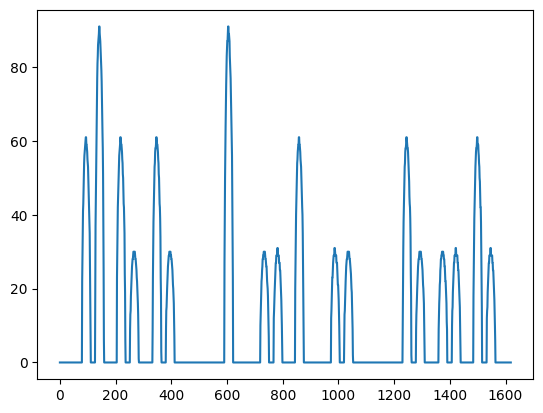

In [10]:
from histograms import histograms
hist = cv2.reduce(thresh_inv.T,1,cv2.REDUCE_AVG).reshape(-1)
plt.plot(hist)

(array([1620.,  540.,  474.,  335.,  204.,  166.,  121.,   43.,   35.,
          24.]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <BarContainer object of 10 artists>)

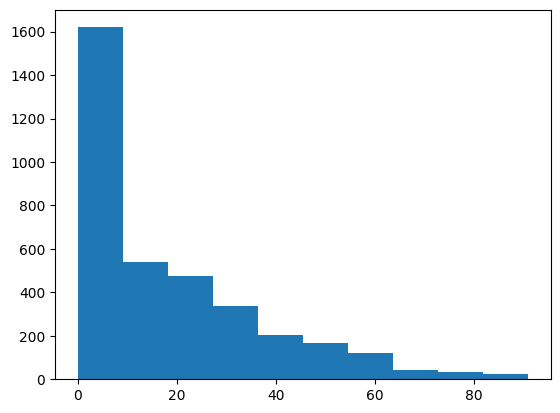

In [14]:
histo = plt.hist(hist,cumulative=-1)
histo

In [11]:
hist

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [12]:
oldsize = hist.size
oldsize

1620

In [13]:
extractedidx = np.empty(0)
extractedidx

array([], dtype=float64)

In [14]:
for i in range(0,oldsize):
  if(hist[i]>20):
    extractedidx = np.append(extractedidx , i)

In [15]:
extractedidx

array([  80.,   81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,
         89.,   90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,
         98.,   99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,
        107.,  108.,  128.,  129.,  130.,  131.,  132.,  133.,  134.,
        135.,  136.,  137.,  138.,  139.,  140.,  141.,  142.,  143.,
        144.,  145.,  146.,  147.,  148.,  149.,  150.,  151.,  152.,
        153.,  154.,  155.,  156.,  157.,  205.,  206.,  207.,  208.,
        209.,  210.,  211.,  212.,  213.,  214.,  215.,  216.,  217.,
        218.,  219.,  220.,  221.,  222.,  223.,  224.,  225.,  226.,
        227.,  228.,  229.,  230.,  231.,  232.,  233.,  257.,  258.,
        259.,  260.,  261.,  262.,  263.,  264.,  265.,  266.,  267.,
        268.,  269.,  270.,  271.,  272.,  273.,  274.,  275.,  276.,
        277.,  334.,  335.,  336.,  337.,  338.,  339.,  340.,  341.,
        342.,  343.,  344.,  345.,  346.,  347.,  348.,  349.,  350.,
        351.,  352.,

In [32]:
extractedwords = np.empty(0)
for i in range(0,extractedidx.size):
  if(extractedidx[i+1]-extractedidx[i]<35):
    pass
  else :
    extractedwords = np.append(extractedwords,extractedidx[i])

IndexError: ignored

In [33]:
extractedwords


array([ 157.,  277.,  406.,  621.,  793.,  873., 1046., 1304., 1433.])

In [35]:
extractedwords1 = np.empty(0)
extractedwords1 = np.append(extractedwords1 , extractedidx[0])
for i in range(0,extractedidx.size):
  if(extractedidx[i+1]-extractedidx[i]<35):
    pass
  else:
    extractedwords1 = np.append(extractedwords1,extractedidx[i+1])

IndexError: ignored

In [36]:
extractedwords1

array([  80.,  205.,  334.,  591.,  724.,  846.,  978., 1232., 1364.,
       1486.])

In [39]:
extractedwords = np.append(extractedwords , 1558)

In [40]:
extractedwords

array([ 157.,  277.,  406.,  621.,  793.,  873., 1046., 1304., 1433.,
       1558.])

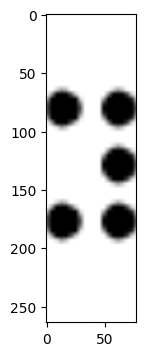

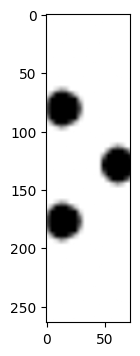

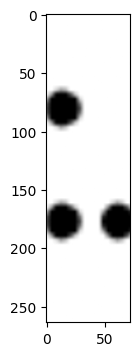

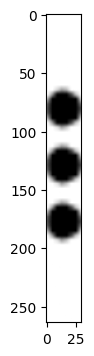

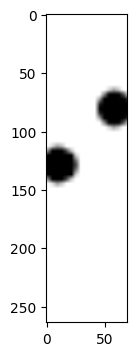

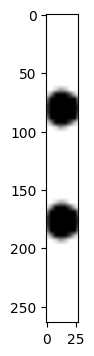

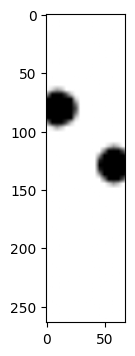

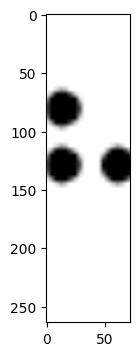

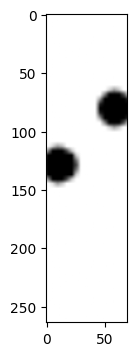

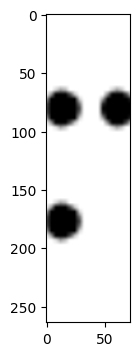

In [47]:
for i in range(0,extractedwords.size) :
  plt.figure(figsize=(4,4))
  plt.imshow(image[:,int(extractedwords1[i]):int(extractedwords[i])],cmap="gray")
  plt.savefig('test_letter' + str(i))



In [48]:
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

K.clear_session()

model_ckpt = ModelCheckpoint('BrailleNet.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(26,26,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(26,activation='softmax')(x)

model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              validation_data=val_generator,
                              epochs=100,
                              callbacks=[model_ckpt,reduce_lr,early_stop],
                              verbose=1)

<ipython-input-48-afa36efc8263>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
39/39 [==============================] - 6s 90ms/step - loss: 3.2921 - accuracy: 0.0264 - val_loss: 3.2594 - val_accuracy: 0.0417 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 3s 73ms/step - loss: 3.2139 - accuracy: 0.0697 - val_loss: 3.0541 - val_accuracy: 0.1410 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 3s 85ms/step - loss: 2.8181 - accuracy: 0.1835 - val_loss: 2.3781 - val_accuracy: 0.2821 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 3s 64ms/step - loss: 2.2059 - accuracy: 0.3854 - val_loss: 1.8038 - val_accuracy: 0.4615 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 3s 71ms/step - loss: 1.7913 - accuracy: 0.5072 - val_loss: 1.5179 - val_accuracy: 0.5641 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 3s 64ms/step - loss: 1.5155 - accuracy: 0.5689 - val_loss: 1.5142 - val_accuracy: 0.5801 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 4s 95ms/step - lo

In [51]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
for i in range(0,9):
  img = image.load_img("/content/test_letter" + str(i) + ".png")
  x = img_to_array(img)
  resized = cv2.resize(x, (26, 26))
  resized=np.expand_dims(resized,axis=0)
  a=np.argmax(model.predict(resized), axis=1)
  letter = chr(a[0] + ord('a') - 1)
  print(letter)

1/1 [==============================] - 0s 147ms/step
r
1/1 [==============================] - 0s 22ms/step
l
1/1 [==============================] - 0s 22ms/step
o
1/1 [==============================] - 0s 25ms/step
q
1/1 [==============================] - 0s 21ms/step
l
1/1 [==============================] - 0s 23ms/step
l
1/1 [==============================] - 0s 25ms/step
l
1/1 [==============================] - 0s 22ms/step
j
1/1 [==============================] - 0s 24ms/step
l
